In [5]:
from fcmeans import FCM
# from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!pip install fuzzy-c-means

In [6]:
data = pd.read_csv('data.csv')

In [18]:
data.sample(5)

,X1,X2
64,0.617,1.182
58,-0.986,-1.275
62,-1.049,-0.500
19,2.130,-1.211
57,-1.789,-0.883


In [8]:
data.shape

(96, 2)

In [9]:
data.describe()

,X1,X2
count,96.000000,96.000000
mean,-0.006542,-0.364729
std,0.968383,1.154477
min,-1.789000,-2.465000
25%,-0.737750,-1.225000
50%,-0.090000,-0.627000
75%,0.755000,0.474750
max,2.224000,2.097000


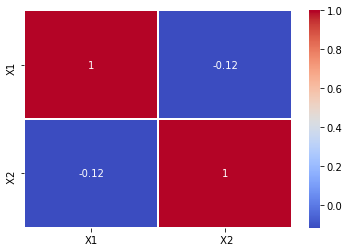

In [10]:
pearsoncorr = data.corr(method='pearson')
sns.heatmap(pearsoncorr,xticklabels=pearsoncorr.columns,yticklabels=pearsoncorr.columns,cmap='coolwarm',
           annot=True,linewidth=0.5)

In [11]:
data = data[['X1', ' X2']]

In [12]:
fcm = FCM(n_clusters=3)
fcm.fit(data)

fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

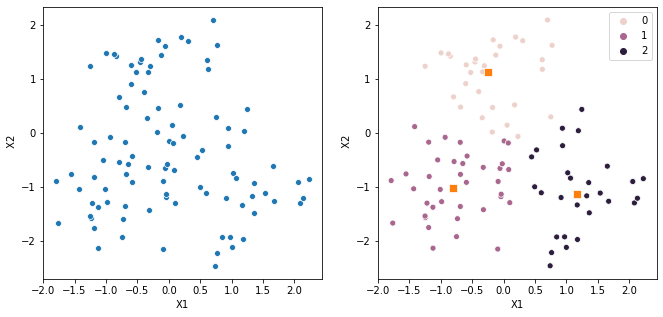

In [21]:
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(data['X1'], data[' X2'], ax=axes[0])
scatter(data['X1'], data[' X2'], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers['X1'], fcm_centers[' X2'], ax=axes[1],marker="s",s=50)
# plt.show()

In [14]:
print(fcm_centers)
print(fcm_labels)

         X1        X2
0 -0.242239  1.123348
1 -0.798337 -1.012991
2  1.167649 -1.127169
[2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 1 1 0 2 2 2 1 2 2 2 2 2 1 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [15]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components= 2)
pca_result = pca.fit_transform(data.values)
pca_cluster_result = pca.fit_transform(fcm_centers.values)

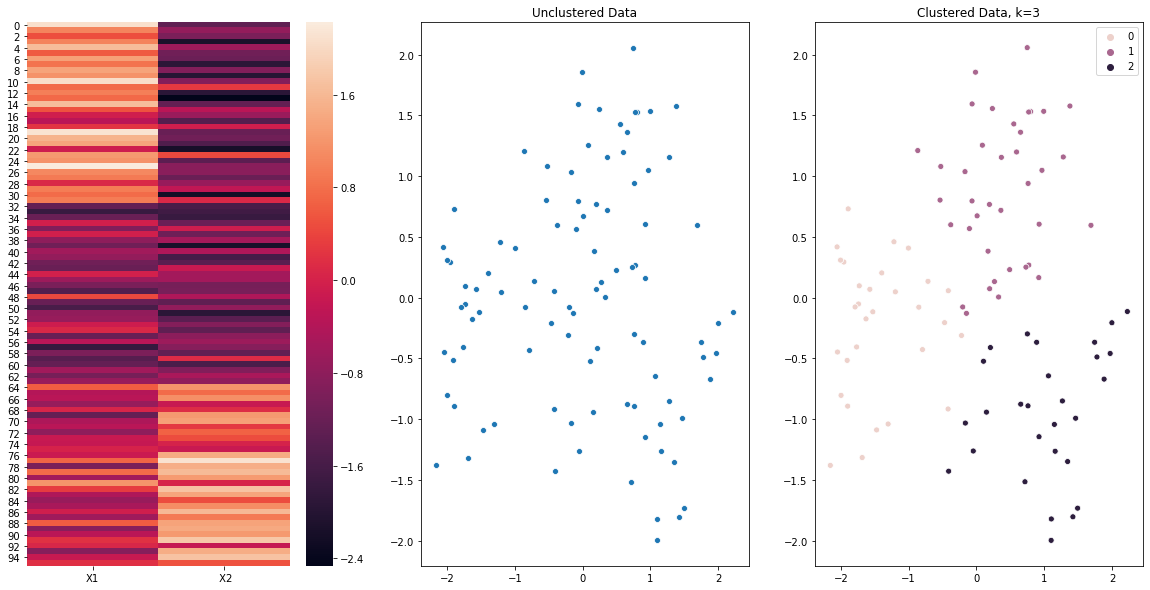

In [17]:
import seaborn as sns
xVal = np.array(pca_result[:, 0])
yVal = np.array(pca_result[:, 1])

pearsoncorr = data.corr(method='pearson')
%matplotlib inline
f, axes = plt.subplots(1, 3, figsize=(20,10))
scatter(xVal, yVal, ax=axes[1])
scatter(xVal, yVal, ax=axes[2], hue=fcm_labels)
sns.heatmap(data, ax=axes[0])
axes[1].set_title('Unclustered Data')
axes[2].set_title('Clustered Data, k=3')
# scatter(pca_cluster_result[:,0], pca_cluster_result[:,1], ax=axes[1],marker="s")
plt.show()